In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lato', 'Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.rcParams['font.sans-serif'] = ['Lato']

plt.rcParams['font.size'] = 10


In [3]:

with open("../02_Reverse_engineering_GRNs_from_AGETs/Input/List_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp) # Load the chosen AGETs#


# filter the tracks to fit to
# tracks = [df['TrackID'][0].astype(str) for df in list_of_cell_tracks if df['g3'].loc[0] < df['g3'].loc[df.shape[0]-1] or df['X'].loc[0] < 100]
tracks = [df['TrackID'][0].astype(str) for df in list_of_cell_tracks if df['X'].loc[0] < 200]

keep_tracks = []
for df in list_of_cell_tracks:
    if df['TrackID'][0].astype(str) in tracks:
        keep_tracks.append(df)

print(len(keep_tracks), len(keep_tracks) * 0.9)




828 745.2


In [4]:
with open("../02_Reverse_engineering_GRNs_from_AGETs/Input/Data_produced_3_medianList_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp)

median_3_cells = pd.concat(list_of_cell_tracks)

with open("../02_Reverse_engineering_GRNs_from_AGETs/Input/Data_produced_5_medianList_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp)

median_5_cells = pd.concat(list_of_cell_tracks)

with open("../02_Reverse_engineering_GRNs_from_AGETs/Input/Data_produced_5_meanList_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp)

mean_5_cells = pd.concat(list_of_cell_tracks)

with open("../02_Reverse_engineering_GRNs_from_AGETs/Input/Data_produced_1_medianList_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp)

median_1_cells = pd.concat(list_of_cell_tracks)

with open("../02_Reverse_engineering_GRNs_from_AGETs/Input/Data_produced_10_medianList_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp)

median_10_cells = pd.concat(list_of_cell_tracks)

In [5]:
col_list = ['#ed392b', '#feb441', '#4090c5']
col_max = ['#af1117', '#ea6e13', '#0f59a3']
gene_list = ['tbxta', 'tbx16', 'tbx6']
emb_cmap = ['Reds', 'YlOrBr', 'Blues']
gene_codes = ['g1', 'g2', 'g3']

Figure: Different AGET construction strategies lead to very similar AGETs. Each row represents a different AGET, and different colour lines represent different AGET construction strategies - namely, combining gene expression from different numbers of neighbouring cells, and using the mean vs median gene expression of neighbouring cells. 

c:\Users\shil5659\Anaconda3\envs\AGET\lib\site-packages\ipykernel_launcher.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
c:\Users\shil5659\Anaconda3\envs\AGET\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


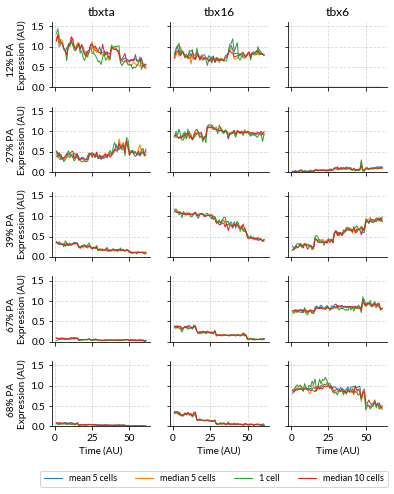

In [6]:
n_cells = 5

grid_spacing = {'hspace': 0.3, 'wspace': 0.2}


fig, axs = plt.subplots(n_cells, 3,
                        sharex = True, sharey = True,
                        tight_layout = True,
                        gridspec_kw=grid_spacing,
                        figsize = (6,7.2))

data = {
    'mean 5 cells': mean_5_cells,
    # 'median_3_cells': median_3_cells,
    'median 5 cells': median_5_cells,
    '1 cell': median_1_cells,
    'median 10 cells': median_10_cells
}

# trackIDs = np.random.choice(np.unique(mean_5_cells['TrackID']), n_cells)
trackIDs = [1000112634.0, 1000113357.0, 1000112601.0, 1000129345.0, 1000129288.0, ]


# for sim_name in data.keys():
sim = data['mean 5 cells']

minx = np.min(sim[sim['Time'] == 1]['X'])
maxx = np.max(sim[sim['Time'] == 1]['X'])

for sim_name in data.keys():
    sim = data[sim_name]

    for i, track in enumerate(trackIDs):
        sim_subset = sim[sim['TrackID'] == track].reset_index(drop = True)
        for j in range(3):
            ax = axs[i,j].plot(
                sim_subset['Time'], sim_subset[gene_codes[j]],
                linewidth = 1, label = sim_name)
            axs[i,j].set_yticks(np.array([0, 0.5, 1.0, 1.5]))
            axs[i, j].set_ylim(0, 1.6)
        ap_pos = round((list(sim_subset['X'])[0] - minx) / (maxx - minx) * 100)


        axs[i,0].set_ylabel(f'{ap_pos}% PA      \nExpression (AU)')


for i in range(3):
    axs[0, i].set_title(gene_list[i])
    axs[-1, i].set_xlabel('Time (AU)')
# handles = [l1, l2]

for ax in axs.flatten():
    ax.set_axisbelow(True)
    ax.grid(True, linestyle='--', alpha=0.5, zorder= 0)
    # ax.axvline(0, alpha = 0.3, color='black', linewidth=1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


plt.subplots_adjust(bottom=0.1)

# Create a legend and position it centered below the subplots
lgd = fig.legend(
    axs[0, 0].get_legend_handles_labels()[1],
    bbox_to_anchor=(0.5, -0.025),
    loc='lower center',
    fontsize="9",
    ncol=5  # Number of columns in the legend
)

# plt.savefig('../graphs/AGET construction strategy.png', bbox_extra_artists=(lgd,),
#             bbox_inches='tight', dpi = 500, facecolor='white', transparent=False)
# # plt.savefig('../graphs/AGET construction strategy.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')

This figure shows where individual cells graphed above are present in the embryo. 

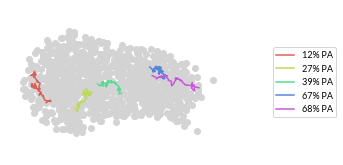

In [7]:
# trackIDs = np.random.choice(np.unique(mean_5_cells['TrackID']), 5)

import seaborn as sns

sim_t1 = sim[sim['Time'] == 1]

plt.figure(figsize=(5, 2.4), tight_layout = True)

col = sns.color_palette("hls", 5)


plt.scatter(sim_t1['X'], sim_t1['Y'], c = 'lightgrey')
for i, track in enumerate(trackIDs):
    sim_subset = sim[sim['TrackID'] == track].reset_index(drop = True)
    ap_pos = round((list(sim_subset['X'])[0] - minx) / (maxx - minx) * 100)
    plt.plot(sim_subset['X'], sim_subset['Y'], label = f'{ap_pos}% PA', c = col[i])


lgd = plt.legend(
    bbox_to_anchor=(1.5, .5),
    loc='right',
    fontsize="9",
    ncol=1  # Number of columns in the legend
)

plt.axis('equal')
plt.axis('off')


# plt.savefig('../graphs/AGET construction strategy_cell positions.png', #bbox_extra_artists=(lgd,),
#             bbox_inches='tight', dpi = 500, facecolor='white', transparent=False)


This figure shows the pattern on the embryo, at the first timepoint, for different methods of constructing AGETs as above. 

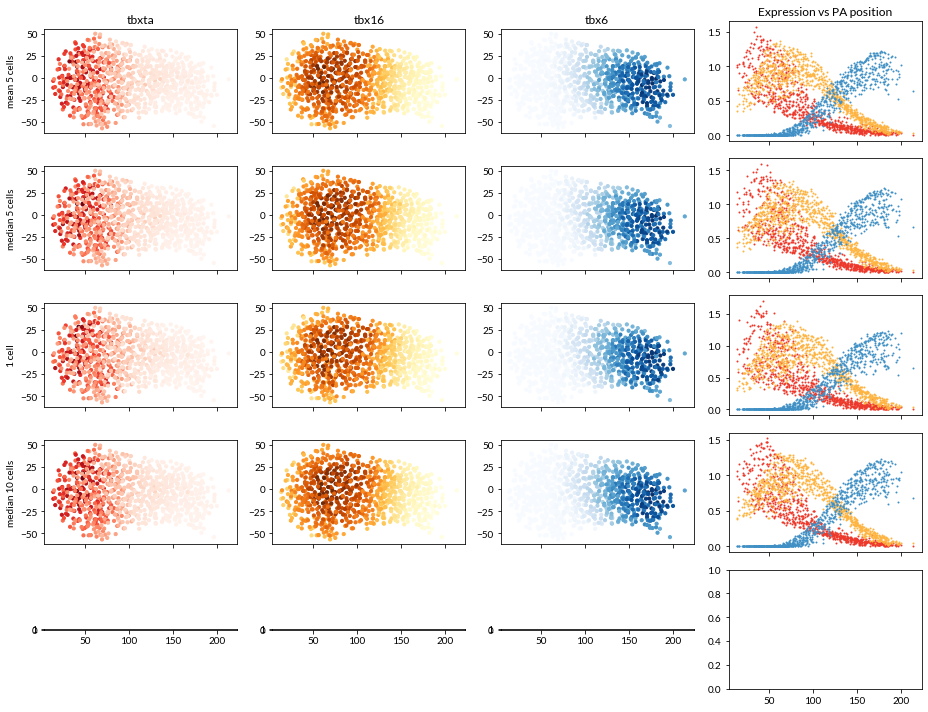

In [8]:
fig, axs = plt.subplots(
    5,4, sharex = True, sharey = False,
    tight_layout = True,
    figsize = (13, 10))


for i, sim_name in enumerate(data.keys()):
    sim = data[sim_name]
    sim_t1 = sim[sim['Time'] == 1]
    axs[i, 0].set_ylabel(sim_name)
    for j in range(3):
        axs[i, j].scatter(
            sim_t1['X'], sim_t1['Y'],
            c = list(sim_t1[gene_codes[j]]),
            cmap = emb_cmap[j], s=10)
        axs[i, 3].scatter(sim_t1['X'], sim_t1[gene_codes[j]],
                          c = col_list[j], s = 1)


axs[0, 3].set_title('Expression vs PA position')


for ax in axs[:, 0:3].flatten():
    ax.set_aspect('equal')
    # ax.axis('off')


for i in range(3):
    axs[0, i].set_title(gene_list[i])

# plt.savefig('../graphs/AGET construction strategy pattern.png', dpi = 500)
# plt.savefig('../graphs/AGET construction strategy pattern.svg')

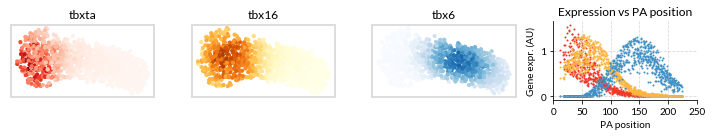

In [9]:
fig, axs = plt.subplots(
    1,4, sharex = False, sharey = False,
    tight_layout = True,
    figsize = (10,2))


sim = data['median 5 cells']
sim_t1 = sim[sim['Time'] == 61]
# axs[i].set_ylabel(sim_name)
for j in range(3):
    axs[j].scatter(
        sim_t1['X'], sim_t1['Y'],
        c = list(sim_t1[gene_codes[j]]),
        cmap = emb_cmap[j], s=10, vmin = 0, vmax = 1.6)
    axs[3].scatter(sim_t1['X'], sim_t1[gene_codes[j]],
                        c = col_list[j], s = 1)


axs[3].set_title('Expression vs PA position')


for ax in axs[0:3]:
    ax.set_aspect('equal')
    # ax.axis('off')
    ax.spines[['bottom', 'top', 'right', 'left']].set_color('#dddddd')
    ax.spines[['bottom', 'top', 'right', 'left']].set_linewidth(2)

    ax.set_xticks([])
    ax.set_yticks([])

# for ax in axs[3:]:
# ax.set_axisbelow(True)
axs[3].grid(True, linestyle='--', alpha=0.5, zorder= 0)
# ax.axvline(0, alpha = 0.3, color='black', linewidth=1)

axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].set_xticks([0, 50, 100, 150, 200, 250])



for i in range(3):
    axs[i].set_title(gene_list[i])

axs[3].set_xlabel('PA position')
axs[3].set_ylabel('Gene expr. (AU)')


# plt.savefig('../graphs/AGET_pattern.png', dpi = 500)

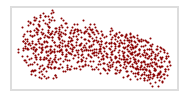

In [10]:
fig, ax = plt.subplots(1,1, figsize = (12/4,3))

plt.scatter(sim_t1['X'], sim_t1['Y'], c = 'darkred', s = 1)
ax.set_aspect('equal')
# ax.axis('off')
ax.spines[['bottom', 'top', 'right', 'left']].set_color('#dddddd')
ax.spines[['bottom', 'top', 'right', 'left']].set_linewidth(2)

ax.set_xticks([])
ax.set_yticks([])

# plt.savefig('../graphs/tracks1.png', dpi = 600, transparent=True)

In [11]:
# Replace 'your_excel_file.xlsx' with the actual path to your Excel file
excel_file_path = '../Input/input_HCR_1.xls'

# Replace 'Positions' with the sheet name you want to read
sheet_name = 'Position Reference Frame'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path, sheet_name=sheet_name, skiprows=1)
df

,Position X Reference Frame,Position Y Reference Frame,Position Z Reference Frame,Unit,Category,Collection,ReferenceFrame,Time,ID
0,94.028999,-19.826900,10.3604,um,Spot,Position Reference Frame,Reference Frame 1,1,0
1,133.761002,-20.612101,12.1944,um,Spot,Position Reference Frame,Reference Frame 1,1,1
2,128.658005,-21.951700,14.4613,um,Spot,Position Reference Frame,Reference Frame 1,1,2
3,116.301003,-18.750299,12.0410,um,Spot,Position Reference Frame,Reference Frame 1,1,3
4,104.478996,-18.215599,10.4017,um,Spot,Position Reference Frame,Reference Frame 1,1,4
...,...,...,...,...,...,...,...,...,...
852,100.334999,28.661501,35.1689,um,Spot,Position Reference Frame,Reference Frame 1,1,854
853,94.351700,30.104500,36.4519,um,Spot,Position Reference Frame,Reference Frame 1,1,855
854,132.091003,23.294500,15.6505,um,Spot,Position Reference Frame,Reference Frame 1,1,856
855,141.244995,22.620100,18.5371,um,Spot,Position Reference Frame,Reference Frame 1,1,857


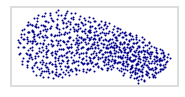

In [12]:


fig, ax = plt.subplots(1,1, figsize = (12/4,3))

ax.scatter(df['Position X Reference Frame'], df['Position Y Reference Frame'], s = 1, color = 'darkblue')
ax.set_aspect('equal')
# ax.axis('off')
ax.spines[['bottom', 'top', 'right', 'left']].set_color('#dddddd')
ax.spines[['bottom', 'top', 'right', 'left']].set_linewidth(2)

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('../graphs/tracks2.png', dpi = 500, transparent=True)